# Introduction

Inner product space is a vector space with a function referred to as the inner product. The inner product returns a scalar and defines an angle between two vectors. A valid inner product holds certain properties, which are detailed below. A complete inner product space is referred to as a Hilbert space.


# Detailed Discussion

An inner product space is a subspace of metric and norm spaces. An inner product space is a vector space with an inner product. An inner product is written generally as:
\begin{equation}
<\cdot,\cdot>~:~\mathbf{V}\times \mathbf{V}\rightarrow \mathbf{S}
\end{equation}
that is the inner product maps vectors to a scalar value (can be complex). This scalar value can be interpreted as an angle.  The inner product of two vectors is also used to determine orthogonality (inner product is equal to zero), which is important in many signal processing applications. Examples include the Cauchy-Schwartz inequality and the projection theorem. A valid inner product has the following properties:
\begin{equation}
    <x,y>~=~\overline{<y,x>}
\end{equation}   
\begin{align}
    & <\alpha x,y>~=~\alpha<y,x>\nonumber\\
    & <x,\alpha y>~=~\overline{\alpha}<y,x>
\end{align}  
\begin{equation}
    <x+y,z>~=~<x,z>~+~<y,z>
\end{equation}  
\begin{equation}
    <x,x>~\geq~0
\end{equation}
The last being equal to zero if and only if $x=0$.

# Examples of Inner Products

Below are examples of various spaces with valid inner products.
## Real Numbers ($\mathbb{R}$)
A valid inner product for real numbers is multiplication:
\begin{equation}
    <x,y>~:=~xy
\end{equation}

## Euclidean Space ($\mathbb{C}^n$)
For $\mathbf{x},\mathbf{y}~\epsilon~\mathbb{C}^n$ the inner product is defined as :
\begin{align}
    &<\mathbf{x},\mathbf{y}>~=~x_1y_1 + x_2y_2 + \cdots + x_ny_n \\
    & =~\mathbf{y}^H\mathbf{x}~=~\mathbf{x}^H\mathbf{y}
\end{align}
This inner product is referred to as the Euclidean inner product or the dot product.

## Hilbert Spaces
A Hilbert space is a complete normed vector space with an inner product. A complete vector space means that every Cauchy sequence in $\mathbf{X}$ converges to an element in $\mathbf{X}$. The sequence space $l_p(0,\infty)$ and $L_p[a,b]$ are Hilbert spaces with valid inner products when $p=2$. The Euclidean space mentioned above is also a Hilbert space. The inner product for $L_2[a,b]$ is:
\begin{equation}
<f(x),g(x)>~:=~\int f(x)\overline{g(x)}
\end{equation}
The inner product for $l_2(0,\infty)$ is:
\begin{equation}
<\mathbf{x},\mathbf{y}>~:=~\sum_{i=0}^\infty x_iy_i
\end{equation}

## Random Variables
Two random variables $\mathbf{X}$ and $\mathbf{Y}$ have the following inner product which is the expectation of their product:
\begin{equation}
<\mathbf{X},\mathbf{Y}>~:=~\mathbf{E}(\mathbf{XY})
\end{equation}

## Real Matrices
Real matrices have the following inner product, where $\mathbf{A}$ and $\mathbf{B}$ are not necessarily square matrices:
\begin{equation}
    <\mathbf{A},\mathbf{B}>~:=~\text{tr}(\mathbf{AB}^T)
\end{equation}

## Induced Norm
Every inner product induces a norm, which means that every inner product space is a normed vector space. The induced norm is defined as follows:
\begin{equation}
    ||x||~=~\sqrt{<x,x>}
\end{equation}


# Simple Code Example

The following are two simple examples of two different inner products, one is performed on matrices and the other on functions. The results of the inner products below show orthogonality between the arguments. The first is an inner product between two complex matrices. The other is an inner product performed on two orthogonal functions on the interval $[-1,1]$.

A:  [1j, 0, 1]
B:  [0, 9, 0]
Result of the inner product of the two vectors:
[[0.+0.j]]



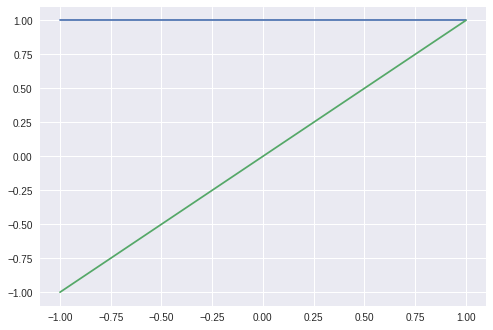

Result of the inner product of the two lines:
-3.469446951953614e-18
The result is essentially zero.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

def Euclid_inner_p (A,B):
  am = np.matrix(A)
  bm = np.matrix(B)
  bm = bm.getH()
  result = am * bm
  return result

def Function_inner_p(t,F,G):
  Fa = np.array(F)
  Ga = np.array(G)
  ta = np.array(t) # time
  temp = np.multiply(Fa,Ga)
  result = np.trapz(temp,ta) # integrate
  return result

# Two simple orthogonal complex matrices
A = [1.j,0,1]
B = [0,9,0]

result = Euclid_inner_p(A,B)

print("A: ",A)
print("B: ",B)
print("Result of the inner product of the two vectors:")
print(result)
print()

# Simple orthogonal functions on [-1,1]
t = np.linspace(-1,1,100)
F = t
G = t**2

result2 = Function_inner_p(t,F,G)

# Plot the two lines
plt.plot(t,F)
plt.plot(t,G)
plt.show()

# Result of the inner product
print("Result of the inner product of the two lines:")
print(result2)
print("The result is essentially zero.")

# Engineering Code Example

The following code is an example of the Gram Schmidt process, which orthonormalizes a set of matrices.  Gram Schmidt uses the inner product and the induced norm to accomplish this. The orthonormal matrices are used to find a linear combination of functions that approximate the actual function. This could be applied to any function that you need to approximate. Below a linear cobination of $1$, $t$, and $t^2$ are used to approximate $e^{-t}$ on $[0,3]$. A plot of the actual data and the approximation are shown, along with the coefficients of $1$, $t$, and $t^2$ used to make the approximation.


Plot of the actual data


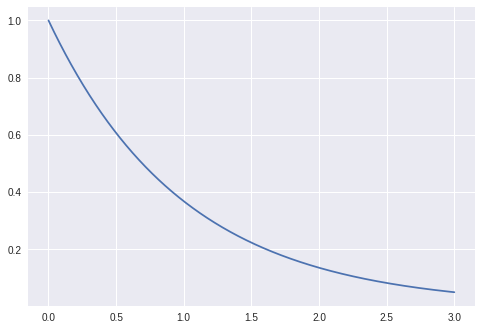

Plot of the approximation


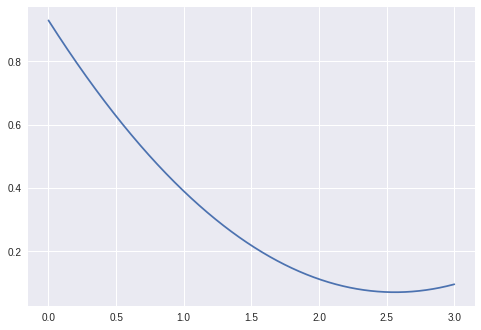

Coeffitients:
[0.5486061041436288, -0.4163126284419313, 0.15180819354490815]


In [0]:
import numpy as np
import matplotlib.pyplot as plt

def inner_p(t,F,G): # inner product of two functions
  temp = np.multiply(F,G)
  result = np.trapz(temp,t) # use trapz to approximate integration
  return result

def norm(t,F): # induced norm for the inner product
  result = np.sqrt(inner_p(t,F,F))
  return result

def proj(t,y,e): # project y onto e
  temp = np.multiply(y,e)
  result = np.trapz(temp,t)
  return result

num = 1000

t = np.linspace(0,3,num).T
# actual data
y = np.exp(-t)

# Plot the actual data
print("Plot of the actual data")
plt.plot(t,y)
plt.show()

# Create 3 lists, each with 100 items, all set to 0
p = np.zeros((3,num))
e = np.zeros((3,num))
q = np.zeros((3,num))
total = np.zeros((3,num))

# the signal is a linear combination of the following functions
p[2][:] = t**2
p[1][:] = t
p[0][:] = np.linspace(1,1,num) # an array of ones

# Perform Gram Schmidt
# to find orthonormal basis
for kk in range(0, 3):
  if kk == 0:
    e[kk][:] = p[kk][:]/norm(t,p[kk][:])
  else:
    for n in range(0,kk):
      total[kk][:] = total[kk][:] + inner_p(t,p[kk][:],e[n][:])*e[n][:]
    # end of for loop
    q[kk][:] = p[kk][:] - total[kk][:]
    e[kk][:] = q[kk][:]/norm(t,q[kk][:])
  # end of if statement

y_approx = np.zeros(num) 
scale = [0,0,0]

# Project y_noise onto each orthonormal basis e 
for kk in range(0,3):
  scale[kk] = proj(t,y,e[kk][:]) # project using the inner product
  y_approx = y_approx + scale[kk]*e[kk][:]

print("Plot of the approximation")
plt.plot(t,y_approx)
plt.show()

print("Coeffitients:")
print(scale)




# References

[1] Mathmatical Methods and Algorithms for Signal Processing, Moon and Sterling 2000

[2] Orthogonal Functions, Wikipedia, https://en.wikipedia.org/wiki/Orthogonal_functions

[3] Inner Product Space, Wikipedia, https://en.wikipedia.org/wiki/Inner_product_space